In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [9]:
path_2 = 'ex1data2.txt'
data_2 = pd.read_csv(path_2, header=None, names=['House Size', 'Bedrooms', 'Price'])
length = len(data_2.index)

In [10]:
# Define function to compute feature normalization
def featureNormalize(X): 
    length = len(X.columns)
    for i in range(length):
        mean = X.mean()
        std = X.std()
    return ((X - mean) / std, mean, std)

In [11]:
(data_2, mean, std) = featureNormalize(data_2)

ones = pd.Series(1, index=data_2.index)
data_2.insert(0, 'ones', ones)
columns = len(data_2.columns)

X = data_2.iloc[:, 0:columns-1]
y = data_2.iloc[:, columns-1:columns]

X = np.matrix(X.values)
y = np.matrix(y.values)

iterations = 400
alpha = 0.01
theta = np.matrix(np.zeros((1, X.shape[1])))

In [16]:
def computeCost(X, theta, y):
    hypothesis = X * theta.T
    cost = np.power((hypothesis - y), 2).sum() / (2 * length)
    return cost

In [17]:
def gradientDescent(X, y, theta, alpha, iterations):
    cost = np.zeros(iterations)
                           
    for i in range(iterations):
        hypothesis = X * theta.T
        theta = theta - alpha / length * ((hypothesis - y).T * X) 
        cost[i] = computeCost(X, theta, y)
        
    return theta, cost

In [18]:
# Initial cost
computeCost(X, theta, y)

0.48936170212765967

In [19]:
# Resulting parameters 
theta, cost = gradientDescent(X, y, theta, alpha, iterations)
theta

matrix([[ -1.31112615e-16,   8.00441430e-01,   2.93790099e-02]])

In [20]:
# Final cost
computeCost(X, theta, y)

0.13368618563317541

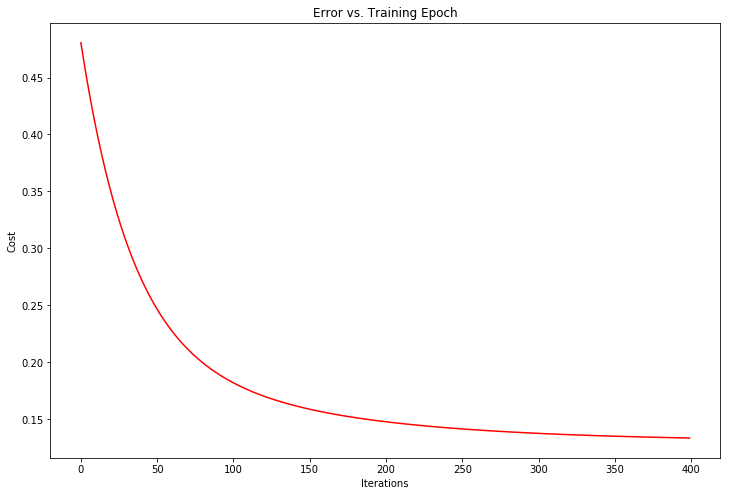

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

plt.show()